# Заполнение пропусков данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')

#### HomePlanet

In [35]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [36]:
test.HomePlanet.value_counts()

HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64

Заполняем пропуски самым популярным значением

In [37]:
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

In [38]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

#### CryoSleep

In [39]:
train.CryoSleep.value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

Заполняем пропуски самым популярным значением

In [40]:
train['CryoSleep'] = train['CryoSleep'].fillna(False)
test['CryoSleep'] = test['CryoSleep'].fillna(False)

C:\Users\menin\AppData\Local\Temp\ipykernel_17740\603792470.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['CryoSleep'] = train['CryoSleep'].fillna(False)
C:\Users\menin\AppData\Local\Temp\ipykernel_17740\603792470.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep'] = test['CryoSleep'].fillna(False)


#### Cabin_deck

In [41]:
train.Cabin_deck.value_counts()

Cabin_deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Заполняем пропуски значением из предыдущей строки

In [42]:
train['Cabin_deck'] = train['Cabin_deck'].ffill()
test['Cabin_deck'] = test['Cabin_deck'].ffill()

#### Cabin_num

In [43]:
train.Cabin_num.value_counts()

Cabin_num
82.0      28
86.0      22
19.0      22
56.0      21
176.0     21
          ..
1644.0     1
1515.0     1
1639.0     1
1277.0     1
1894.0     1
Name: count, Length: 1817, dtype: int64

Заполняем пропуски значением из предыдущей строки


In [44]:
train.Cabin_num.isnull().sum()

199

In [45]:
train['Cabin_num'] = train['Cabin_num'].ffill()
test['Cabin_num'] = test['Cabin_num'].ffill()

#### Cabin_side

In [46]:
train.Cabin_side.value_counts()

Cabin_side
S    4288
P    4206
Name: count, dtype: int64

Заполняем пропуски значением из предыдущей строки


In [47]:
train['Cabin_side'] = train['Cabin_side'].ffill()
test['Cabin_side'] = test['Cabin_side'].ffill()

#### Destination

In [48]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

Заполняем пропуски самым популярным значением

In [49]:
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

#### Age

Заполняем все пустые значение возраста (Age) произвольным числом из диапазона от (mean_age - std_age) и до (mean_age + std_age)

In [50]:
train_test_data = [train, test]
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [51]:
train.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP            203
Name           200
Transported      0
Group            0
Cabin_deck       0
Cabin_num        0
Cabin_side       0
Amenities      908
dtype: int64

#### VIP

In [52]:
train.VIP.value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

Заполняем пропуски самым  популярным значением

In [53]:
train['VIP'] = train['VIP'].fillna(False)
test['VIP'] = test['VIP'].fillna(False)

C:\Users\menin\AppData\Local\Temp\ipykernel_17740\2557423949.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['VIP'] = train['VIP'].fillna(False)
C:\Users\menin\AppData\Local\Temp\ipykernel_17740\2557423949.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP'] = test['VIP'].fillna(False)


#### Amenities

In [54]:
train.Amenities.value_counts()

Amenities
0.0        3247
809.0        50
788.0        39
804.0        36
803.0        34
           ... 
7994.0        1
12238.0       1
397.0         1
2871.0        1
4637.0        1
Name: count, Length: 2116, dtype: int64

Заполняем пропуски самым  популярным значением

In [55]:
train['Amenities'] = train['Amenities'].fillna(0)
test['Amenities'] = test['Amenities'].fillna(0)

In [56]:
train.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
Name           200
Transported      0
Group            0
Cabin_deck       0
Cabin_num        0
Cabin_side       0
Amenities        0
dtype: int64

In [57]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Group,Cabin_deck,Cabin_num,Cabin_side,Amenities
0,0001_01,Europa,False,TRAPPIST-1e,39,False,Maham Ofracculy,False,0001,B,0.0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24,False,Juanna Vines,True,0002,F,0.0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58,True,Altark Susent,False,0003,A,0.0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33,False,Solam Susent,False,0003,A,0.0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16,False,Willy Santantines,True,0004,F,1.0,S,1091.0


### Приведём данные к численному виду

In [58]:
train_test_data = [train, test]

#### HomePlanet

In [59]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [60]:
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 0, 'Mars': 1, 'Europa': 2} ).astype(int)

#### CryoSleep

In [61]:
train.CryoSleep.unique()

array([False,  True])

In [62]:
for dataset in train_test_data:
    dataset['CryoSleep'] = dataset['CryoSleep'].map( {False: 0, True: 1} )

#### Destination

In [63]:
train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [64]:
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].map( {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2} )

#### VIP

In [65]:
train.VIP.unique()

array([False,  True])

In [66]:
for dataset in train_test_data:
    dataset['VIP'] = dataset['VIP'].map( {False: 0, True: 1} )

#### Cabin_deck

In [67]:
train.Cabin_deck.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [68]:
for dataset in train_test_data:
    dataset['Cabin_deck'] = dataset['Cabin_deck'].map( {'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7} )

#### Cabin_side

In [69]:
train.Cabin_side.unique()

array(['P', 'S'], dtype=object)

In [70]:
for dataset in train_test_data:
    dataset['Cabin_side'] = dataset['Cabin_side'].map( {'P': 0, 'S': 1} )

#### Age

In [71]:
for dataset in train_test_data:
    dataset['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False, observed=False).mean())

          AgeBand  Transported
0  (-0.079, 15.8]     0.645883
1    (15.8, 31.6]     0.475426
2    (31.6, 47.4]     0.485900
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235


In [72]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 63, 'Age'] = 4
    
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Group,Cabin_deck,Cabin_num,Cabin_side,Amenities,AgeBand
0,0001_01,2,0,0,2,0,Maham Ofracculy,False,0001,0,0.0,0,0.0,"(31.6, 47.4]"
1,0002_01,0,0,0,1,0,Juanna Vines,True,0002,1,0.0,1,736.0,"(15.8, 31.6]"
2,0003_01,2,0,0,3,1,Altark Susent,False,0003,2,0.0,1,10383.0,"(47.4, 63.2]"
3,0003_02,2,0,0,2,0,Solam Susent,False,0003,2,0.0,1,5176.0,"(31.6, 47.4]"
4,0004_01,0,0,0,0,0,Willy Santantines,True,0004,1,1.0,1,1091.0,"(15.8, 31.6]"


#### Amenities

In [73]:
for dataset in train_test_data:
    dataset['AmenitiesBand'] = pd.qcut(train['Amenities'], 2)
    
print (train[['AmenitiesBand', 'Transported']].groupby(['AmenitiesBand'], as_index=False, observed=False).mean())

      AmenitiesBand  Transported
0   (-0.001, 643.0]     0.704990
1  (643.0, 35987.0]     0.302026


In [74]:
for dataset in train_test_data:
    dataset.loc[ dataset['Amenities'] <= 650, 'Amenities'] = 0
    dataset.loc[ dataset['Amenities'] > 650, 'Amenities'] = 1
    
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Group,Cabin_deck,Cabin_num,Cabin_side,Amenities,AgeBand,AmenitiesBand
0,0001_01,2,0,0,2,0,Maham Ofracculy,False,0001,0,0.0,0,0.0,"(31.6, 47.4]","(-0.001, 643.0]"
1,0002_01,0,0,0,1,0,Juanna Vines,True,0002,1,0.0,1,1.0,"(15.8, 31.6]","(643.0, 35987.0]"
2,0003_01,2,0,0,3,1,Altark Susent,False,0003,2,0.0,1,1.0,"(47.4, 63.2]","(643.0, 35987.0]"
3,0003_02,2,0,0,2,0,Solam Susent,False,0003,2,0.0,1,1.0,"(31.6, 47.4]","(643.0, 35987.0]"
4,0004_01,0,0,0,0,0,Willy Santantines,True,0004,1,1.0,1,1.0,"(15.8, 31.6]","(643.0, 35987.0]"


## Отбор признаков

Удаляем ненужные признаки, столбец PassengerId убираем только из тренировочного набора

In [75]:
features_drop = ['Name', 'AmenitiesBand', 'Cabin_num', 'AgeBand']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [76]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Group,Cabin_deck,Cabin_side,Amenities
0,2,0,0,2,0,False,0001,0,0,0.0
1,0,0,0,1,0,True,0002,1,1,1.0
2,2,0,0,3,1,False,0003,2,1,1.0
3,2,0,0,2,0,False,0003,2,1,1.0
4,0,0,0,0,0,True,0004,1,1,1.0


<AxesSubplot:>

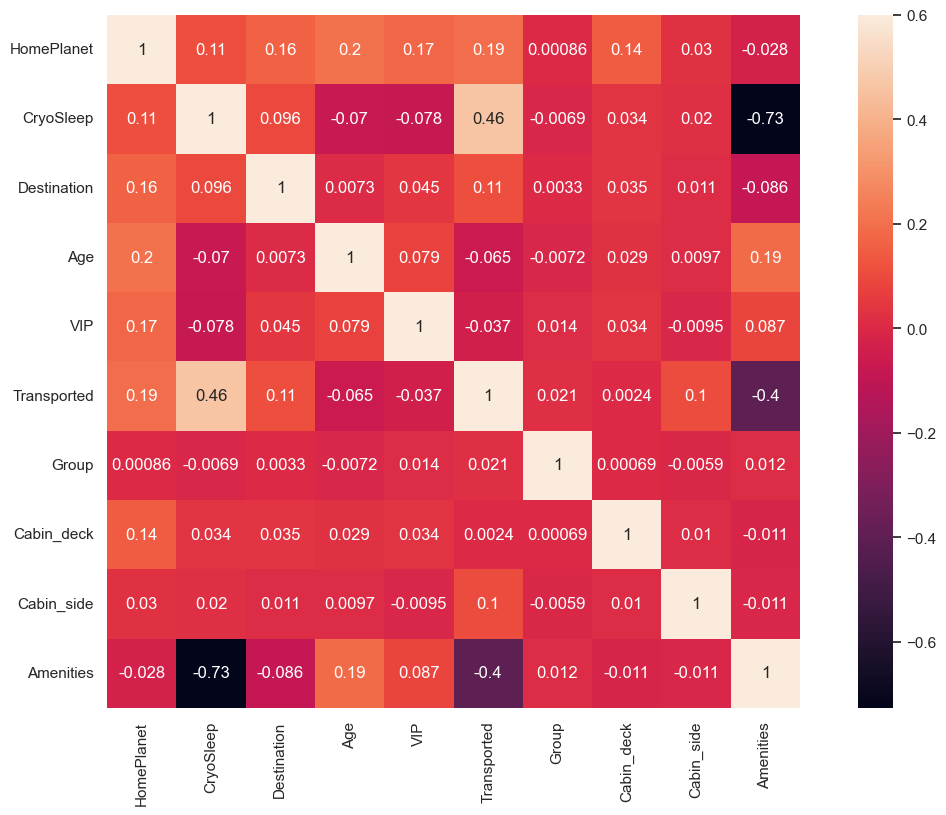

In [77]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

Наиболее важные столбцы - столбцы обладающие корелляцией с Transported: HomePlanet, CryoSleep, Destination, Amenities